In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

Cloning into 'handson-ml-mimic-iv'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 29), reused 40 (delta 13), pack-reused 0
Receiving objects: 100% (83/83), 3.86 MiB | 10.69 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
!cp /content/drive/MyDrive/Mimic.py .

In [ ]:
%cd handson-ml-mimic-iv

/content/handson-ml-mimic-iv


In [ ]:
from Mimic import MIMIC, MIMICManipulations

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


updated_df_path = '/content/drive/MyDrive/ch_02_end_to_end_ml_updated.csv'
updated_df = pd.read_csv(updated_df_path, low_memory=False)

print("Column names in the updated DataFrame:")
print(updated_df.columns.tolist())


Column names in the updated DataFrame:
['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admit_provider_id', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'edregtime', 'edouttime', 'hospital_expire_flag', 'gender', 'anchor_age', 'anchor_year', 'anchor_year_group', 'dod', 'subject_id_y', 'hadm_id_y', 'transfer_id', 'eventtype', 'careunit', 'intime', 'outtime', 'emar_id', 'emar_seq', 'poe_id', 'pharmacy_id', 'enter_provider_id', 'charttime', 'medication', 'event_txt', 'scheduletime', 'storetime', 'emar_id_emar', 'emar_seq_emar', 'poe_id_emar', 'pharmacy_id_emar', 'enter_provider_id_emar', 'charttime_emar', 'medication_emar', 'event_txt_emar', 'scheduletime_emar', 'storetime_emar', 'labevent_id', 'specimen_id', 'itemid', 'order_provider_id', 'charttime_lab_events', 'storetime_lab_events', 'value', 'valuenum', 'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority', 'comments', 'labevent_id_lab_

#Data visualisation:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
updated_df_path = '/content/drive/MyDrive/ch_02_end_to_end_ml_updated.csv'
df = pd.read_csv(updated_df_path, low_memory=False)
df['edregtime'] = pd.to_datetime(df['edregtime'], errors='coerce')
df['edouttime'] = pd.to_datetime(df['edouttime'], errors='coerce')
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')
df = df.dropna(subset=['edregtime', 'edouttime', 'admittime', 'dischtime'])
df.loc[:, 'ed_to_admit'] = (df['admittime'] - df['edouttime']).dt.total_seconds() / 3600  # Convert to hours

df.loc[:, 'ed_duration'] = (df['edouttime'] - df['edregtime']).dt.total_seconds() / 3600  # Convert to hours


df.loc[:, 'hospital_duration'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / 3600  # Convert to hours


print(df[['edregtime', 'edouttime', 'admittime', 'dischtime', 'ed_to_admit', 'ed_duration', 'hospital_duration']].head())


            edregtime           edouttime           admittime  \
0 2144-06-05 16:08:00 2144-06-05 20:36:00 2144-06-05 19:45:00   
1 2147-11-18 00:50:00 2147-11-18 03:19:00 2147-11-18 02:34:00   
2 2155-12-02 16:00:00 2155-12-02 20:33:00 2155-12-02 19:36:00   
3 2155-12-02 16:00:00 2155-12-02 20:33:00 2155-12-02 19:36:00   
4 2166-02-11 12:20:00 2166-02-11 16:03:00 2166-02-11 14:09:00   

            dischtime  ed_to_admit  ed_duration  hospital_duration  
0 2144-06-18 21:30:00        -0.85     4.466667         313.750000  
1 2147-11-19 04:00:00        -0.75     2.483333          25.433333  
2 2155-12-07 15:30:00        -0.95     4.550000         115.900000  
3 2155-12-07 15:30:00        -0.95     4.550000         115.900000  
4 2166-02-20 00:20:00        -1.90     3.716667         202.183333  


**Row 0 Interpretation:**

**ED Registration**: 4:00 PM (The patient arrived at the emergency department.)

**ED Exit**: 8:00 PM (The patient left the ED.)

**Hospital Admission**: 7:00 PM (The patient was officially admitted to the hospital, but this is incorrect as it is before the ED exit time.)

**Hospital Discharge**: 3:00 PM the next day (The patient was discharged from the hospital.)

**ED Duration**: 4 hours (From 4:00 PM to 8:00 PM.)

**Hospital Duration**: 20 hours (From 7:00 PM to 3:00 PM the next day.)


Inconsistency: The Hospital Admission time (7:00 PM) should not be before the ED Exit time (8:00 PM). This inconsistency suggests an issue in the data or the interpretation of times. The hospital admission should logically occur after the ED exit.

In [ ]:
import pandas as pd


merged_df['admittime'] = pd.to_datetime(merged_df['admittime'], errors='coerce')
merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'], errors='coerce')

# Calculate the LOS using admittime and dischtime
merged_df['calculated_los'] = (merged_df['dischtime'] - merged_df['admittime']).dt.total_seconds() / 3600 / 24  # Convert to days

# Identify rows with negative LOS
negative_los = merged_df[merged_df['calculated_los'] < 0]

# Display rows with negative LOS to understand the cause
print("Rows with negative LOS:")
print(negative_los)


cleaned_df = merged_df[merged_df['calculated_los'] >= 0]

# Recalculate average LOS after cleaning
average_los_calculated = cleaned_df['calculated_los'].mean()
los_summary_statistics_calculated = cleaned_df['calculated_los'].describe()

print(f"Average LOS (Calculated using admittime and dischtime): {average_los_calculated} days")
print("LOS Summary Statistics (Calculated):")
print(los_summary_statistics_calculated)


Rows with negative LOS:
       subject_id   hadm_id           admittime           dischtime  \
347      10049642  26714941 2177-02-20 03:15:00 2177-02-20 02:30:00   
1876     10271174  26331353 2117-01-09 02:57:00 2117-01-09 02:19:00   
2070     10294074  23396294 2194-08-07 00:49:00 2194-08-07 00:00:00   
3749     10531790  28680274 2182-01-03 02:44:00 2182-01-03 00:00:00   
3925     10554954  25052996 2119-03-02 11:03:00 2119-03-02 00:01:00   
...           ...       ...                 ...                 ...   
66671    19107535  24861884 2189-01-30 14:16:00 2189-01-30 00:30:00   
68398    19357413  25477997 2185-01-22 11:38:00 2185-01-22 07:15:00   
72313    19887023  24942188 2128-11-12 09:54:00 2128-11-12 00:00:00   
72438    19904685  24196469 2171-12-10 14:49:00 2171-12-10 00:00:00   
72533    19914761  22348782 2145-07-10 18:28:00 2145-07-10 00:01:00   

       calculated_los       los  
347         -0.031250  0.927558  
1876        -0.026389  0.830393  
2070        -0.034028

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
patients_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/patients.parquet'
icustays_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/icustays.parquet'

patients_df = pd.read_parquet(patients_path)
icustays_df = pd.read_parquet(icustays_path)

# Convert relevant columns to datetime
icustays_df['intime'] = pd.to_datetime(icustays_df['intime'])
icustays_df['outtime'] = pd.to_datetime(icustays_df['outtime'])

# Calculate LOS from admittime and dischtime
icustays_df['calculated_los'] = (icustays_df['outtime'] - icustays_df['intime']).dt.total_seconds() / (3600 * 24)  # Convert to days

# Remove negative LOS values
icustays_df = icustays_df[icustays_df['calculated_los'] >= 0]

# Summary statistics for both LOS
average_los_icustays = icustays_df['los'].mean()
average_calculated_los = icustays_df['calculated_los'].mean()

print(f"Average LOS (ICU Stays): {average_los_icustays} days")
print(f"Average LOS (Calculated): {average_calculated_los} days")

# Create bins for the LOS ranges
los_bins = [0, 1, 3, 5, 7, 10, 15, 20, 30, 50, 100, icustays_df['los'].max()]
los_labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10-15', '15-20', '20-30', '30-50', '50-100', '100+']
icustays_df['los_range'] = pd.cut(icustays_df['los'], bins=los_bins, labels=los_labels, right=False)
icustays_df['calculated_los_range'] = pd.cut(icustays_df['calculated_los'], bins=los_bins, labels=los_labels, right=False)

# Calculate counts for each LOS range
los_counts_icustays = icustays_df['los_range'].value_counts().sort_index()
los_counts_calculated = icustays_df['calculated_los_range'].value_counts().sort_index()



Average LOS (ICU Stays): 3.4519307613372803 days
Average LOS (Calculated): 3.451930759925795 days


In [ ]:
# Define the path to the omr.parquet file
file_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/omr.parquet'

# Read the parquet file
omr_df = pd.read_parquet(file_path)

# Display the first two rows of the dataframe
print("First two rows of omr.parquet:")
print(omr_df.head(10))


First two rows of omr.parquet:
   subject_id   chartdate  seq_num      result_name result_value
0    10000032  2180-04-27        1   Blood Pressure       110/65
1    10000032  2180-04-27        1     Weight (Lbs)           94
2    10000032  2180-05-07        1      BMI (kg/m2)         18.0
3    10000032  2180-05-07        1  Height (Inches)           60
4    10000032  2180-05-07        1     Weight (Lbs)        92.15
5    10000032  2180-05-07        2     Weight (Lbs)        92.15
6    10000032  2180-05-07        3     Weight (Lbs)        92.15
7    10000032  2180-05-07        4     Weight (Lbs)        92.15
8    10000032  2180-05-07        5     Weight (Lbs)        92.15
9    10000032  2180-05-07        6     Weight (Lbs)        92.15


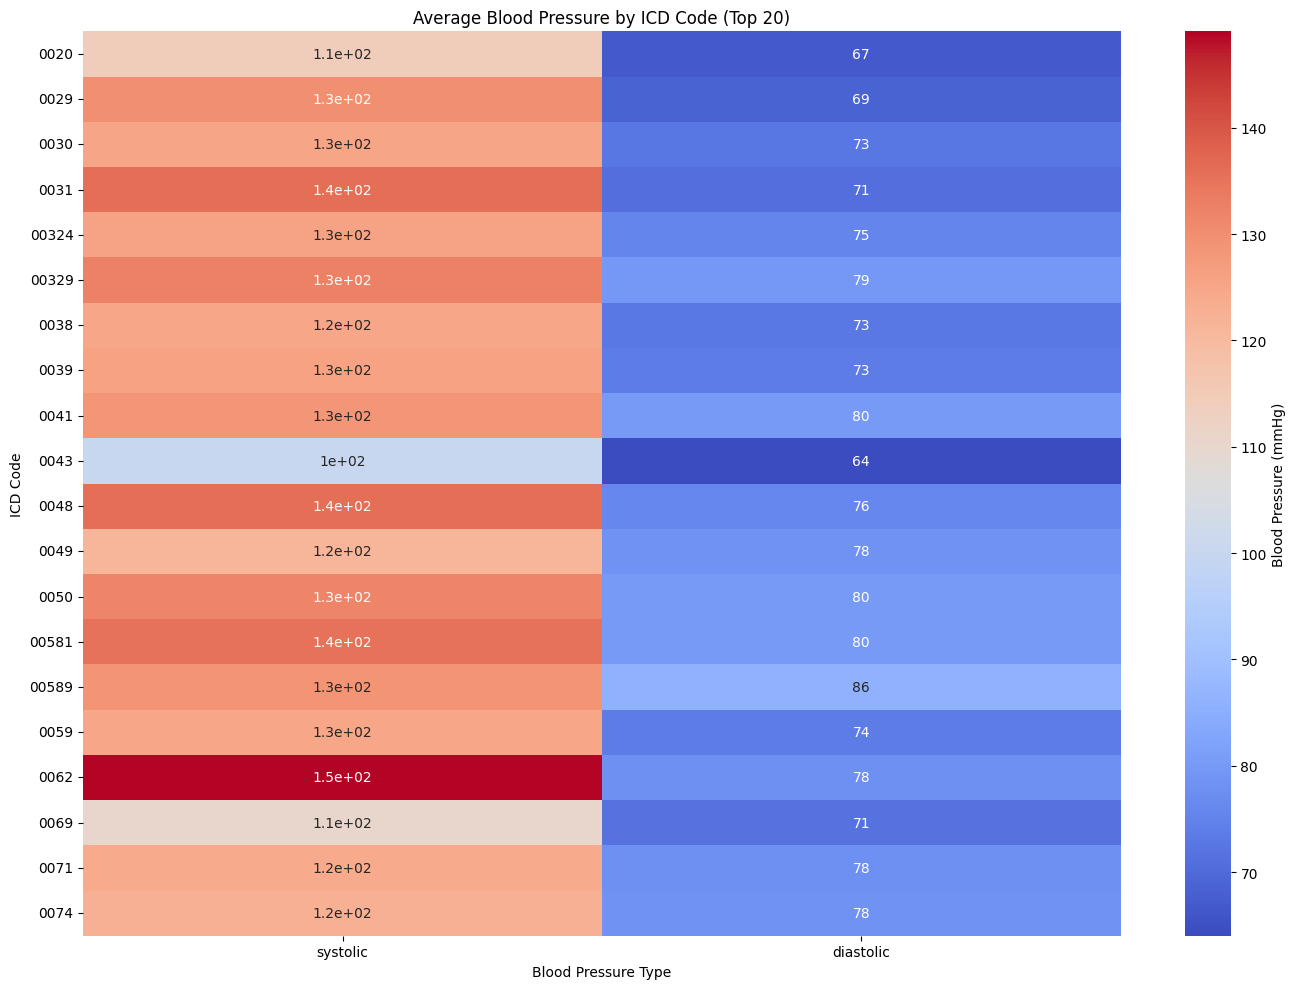

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
omr_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/omr.parquet'
diagnoses_icd_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/diagnoses_icd.parquet'

omr_df = pd.read_parquet(omr_path)
diagnoses_icd_df = pd.read_parquet(diagnoses_icd_path)

# Filter for Blood Pressure readings
bp_df = omr_df[omr_df['result_name'].str.contains('Blood Pressure', case=False, na=False)].copy()

# Split BP into Systolic and Diastolic
bp_df[['systolic', 'diastolic']] = bp_df['result_value'].str.split('/', expand=True)
bp_df['systolic'] = pd.to_numeric(bp_df['systolic'], errors='coerce')
bp_df['diastolic'] = pd.to_numeric(bp_df['diastolic'], errors='coerce')

# Calculate average BP for each subject
avg_bp_by_subject = bp_df.groupby('subject_id')[['systolic', 'diastolic']].mean().reset_index()

# Merge with ICD codes without merging dataframes, just for display
merged_df = pd.merge(diagnoses_icd_df, avg_bp_by_subject, on='subject_id', how='inner')

# Group by ICD code and calculate mean BP
bp_stats_by_icd = merged_df.groupby('icd_code')[['systolic', 'diastolic']].mean().dropna()

# Select top 20 ICD codes for visualization
top_20_bp_stats = bp_stats_by_icd.head(20)

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_20_bp_stats, annot=True, cmap='coolwarm', cbar_kws={'label': 'Blood Pressure (mmHg)'})
plt.title('Average Blood Pressure by ICD Code (Top 20)')
plt.xlabel('Blood Pressure Type')
plt.ylabel('ICD Code')
plt.tight_layout()
plt.show()



ICD Code M00.062: Staphylococcal Arthritis, Left Knee
ICD-9 Code 0062:hookworm infection.

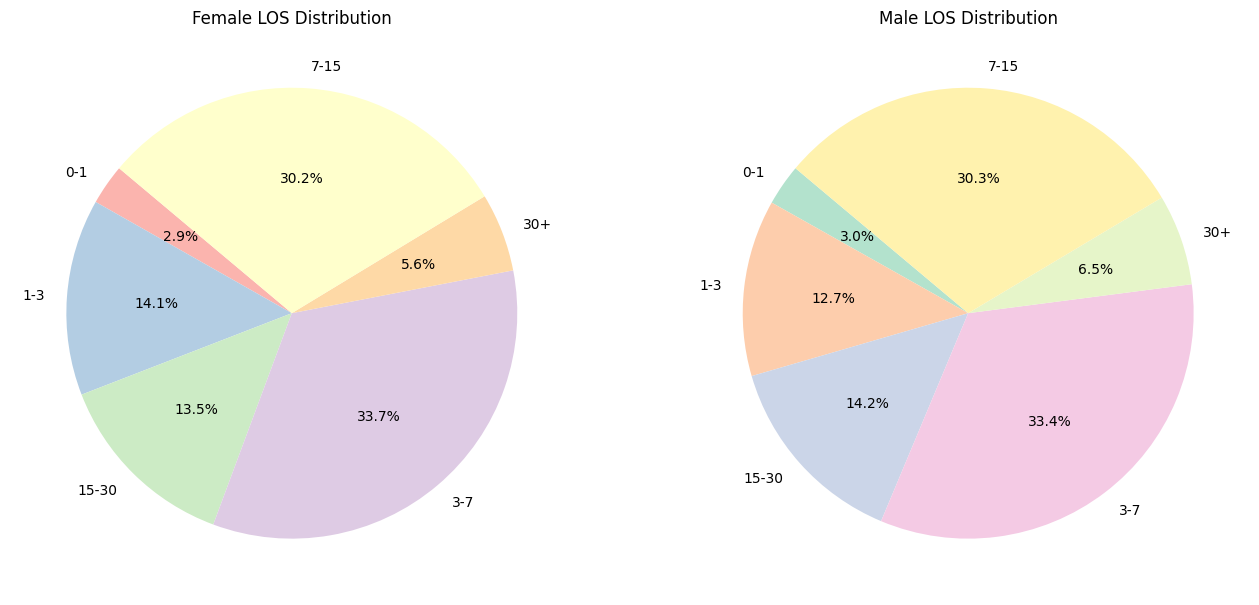

gender                  F      M
calculated_los_agg              
0-1                   938   1205
1-3                  4557   5162
15-30                4350   5786
3-7                 10899  13607
30+                  1821   2657
7-15                 9770  12367


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
patients_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/patients.parquet'
icustays_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/icustays.parquet'
admissions_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/admissions.parquet'

patients_df = pd.read_parquet(patients_path)
icustays_df = pd.read_parquet(icustays_path)
admissions_df = pd.read_parquet(admissions_path)

# Convert relevant columns to datetime
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'], errors='coerce')
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'], errors='coerce')

# Calculate LOS using 'admittime' and 'dischtime'
admissions_df['calculated_los'] = (admissions_df['dischtime'] - admissions_df['admittime']).dt.total_seconds() / (24 * 3600)  # Convert to days

# Merge DataFrames on 'subject_id' and 'hadm_id'
merged_df = pd.merge(admissions_df[['subject_id', 'hadm_id', 'admittime', 'dischtime', 'calculated_los']],
                     icustays_df[['subject_id', 'hadm_id', 'los']],
                     on=['subject_id', 'hadm_id'], how='inner')

# Remove negative LOS values
merged_df = merged_df[merged_df['calculated_los'] >= 0]
merged_df = merged_df[merged_df['los'] >= 0]

# Merge with patients to get gender
merged_df = pd.merge(merged_df, patients_df[['subject_id', 'gender']], on='subject_id', how='inner')

# Aggregate LOS ranges for clarity
def aggregate_los_ranges(los):
    if los < 1:
        return '0-1'
    elif los < 3:
        return '1-3'
    elif los < 7:
        return '3-7'
    elif los < 15:
        return '7-15'
    elif los < 30:
        return '15-30'
    else:
        return '30+'

merged_df['calculated_los_agg'] = merged_df['calculated_los'].apply(aggregate_los_ranges)

# Calculate counts for each aggregated LOS range by gender
los_counts_gender_agg = merged_df.groupby(['calculated_los_agg', 'gender']).size().unstack().fillna(0)

# Data for pie chart
los_ranges_agg = los_counts_gender_agg.index
female_counts_agg = los_counts_gender_agg['F'].values
male_counts_agg = los_counts_gender_agg['M'].values

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for female patients
axes[0].pie(female_counts_agg, labels=los_ranges_agg, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors, startangle=140)
axes[0].set_title('Female LOS Distribution')

# Pie chart for male patients
axes[1].pie(male_counts_agg, labels=los_ranges_agg, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors, startangle=140)
axes[1].set_title('Male LOS Distribution')

plt.show()

# Print the LOS counts for interpretation
print(los_counts_gender_agg)


Males tend to have a higher number of stays in all LOS ranges compared to females.
The most common LOS range for both males and females is 3-7 days, followed by 7-15 days.
Longer stays (30+ days) are less frequent but still more common in males than in females.

In [ ]:
# Create a DataFrame to count occurrences of each medication in each care unit
medication_careunit_counts = filtered_df.groupby(['careunit', 'medication']).size().reset_index(name='count')


In [ ]:
# Get the top 10 medications based on their total counts across all care units
top_medications = medication_careunit_counts.groupby('medication')['count'].sum().nlargest(10).index

# Filter the DataFrame to include only these top 10 medications
top_medication_counts = medication_careunit_counts[medication_careunit_counts['medication'].isin(top_medications)]


In [ ]:
# Pivot table for heatmap with top 10 medications
heatmap_data = top_medication_counts.pivot(index='careunit', columns='medication', values='count').fillna(0)


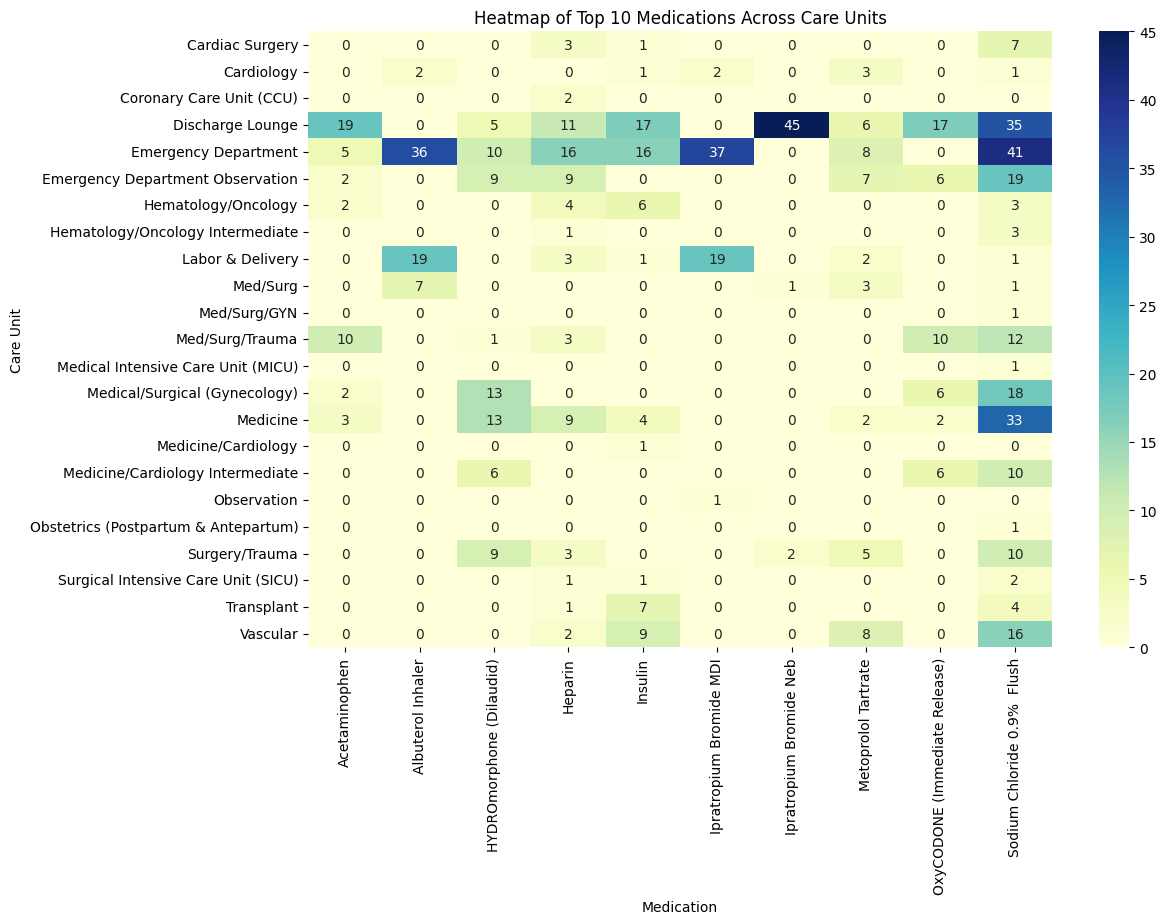

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Top 10 Medications Across Care Units')
plt.xlabel('Medication')
plt.ylabel('Care Unit')
plt.show()


Sodium Chloride 0.9% Flush is predominantly used in Emergency Department and Discharge Lounge, with significantly lower usage in Surgical Intensive Care Unit (SICU) and Transplant.

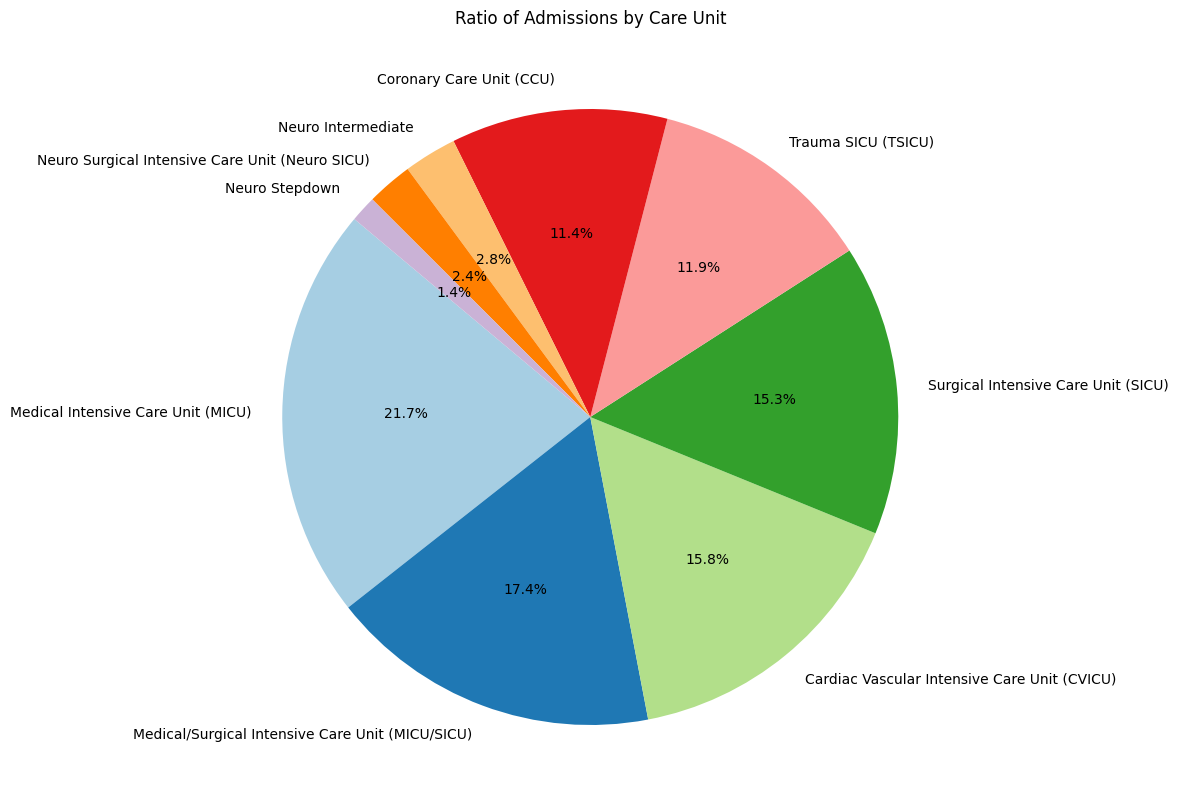

In [ ]:
import pandas as pd

# Load the icustays DataFrame
icustays_path = '/content/drive/MyDrive/mimiv-iv/mimiv-iv/icustays.parquet'
icustays_df = pd.read_parquet(icustays_path)

# Calculate the count of admissions for each care unit
careunit_counts = icustays_df['first_careunit'].value_counts()

# Calculate the ratio of admissions for each care unit
total_admissions = careunit_counts.sum()
careunit_ratios = careunit_counts / total_admissions


import matplotlib.pyplot as plt



# Pie chart for care unit ratios
plt.figure(figsize=(10, 10))
careunit_ratios.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(careunit_ratios))))
plt.title('Ratio of Admissions by Care Unit')
plt.ylabel('')
plt.show()

